Todays EDA is on Obesity Sataset from Kaggle

1)Initial Steps of importing data and analysing it

In [1]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


NObeyesdad is the target column to be classified

In [8]:
len(data.NObeyesdad.unique())#there are 7 unique target classes, means it is multi class classification problem

7

In [9]:
data.info()# we have combination of float and object values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [11]:
# clecking for null values in data and found no null values
data.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
data.describe()# gives certain readings for int or float type of data columns

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [27]:
data.shape

(2111, 17)

In [43]:
# Check the distribution of the target variable
print(data['NObeyesdad'].value_counts(normalize=True))

NObeyesdad
Obesity_Type_I         0.168184
Obesity_Type_III       0.155247
Obesity_Type_II        0.142310
Overweight_Level_II    0.138955
Normal_Weight          0.135122
Overweight_Level_I     0.132247
Insufficient_Weight    0.127935
Name: proportion, dtype: float64


2)Data Cleaning Dtype, Unique and null

In [28]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(data.dtypes, columns=['Dtype'])
df_info['Unique'] = data.nunique().values
df_info['Null'] = data.isnull().sum().values
df_info

,Dtype,Unique,Null
Age,float64,1402,0
Gender,object,2,0
Height,float64,1574,0
Weight,float64,1525,0
CALC,object,4,0
FAVC,object,2,0
FCVC,float64,810,0
NCP,float64,635,0
SCC,object,2,0
SMOKE,object,2,0


its observed that age, height and weight... has more number of unique values

In [29]:
#Converting the "Age" column to integer
data['Age'] = data['Age'].astype(int)

In [30]:
#Float Columns
colums_float = ['Height', 'Weight','NCP', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Round the float columns to two decimal places
data[colums_float] = data[colums_float].round(2)

In [33]:
# Checking for duplicate values
data.duplicated().sum()

24

there are 24 duplicate values out of 2111 rows so can remove them for now but in real time a deep investigation maybe required

In [34]:
# Creating a new DataFrame containing only the duplicate rows
duplicated_df = data.loc[data.duplicated(keep=False), :]
duplicated_df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
105,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,21,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


In [36]:
# Droping duplicates
data = data.drop_duplicates()
data.shape

(2087, 17)

In [37]:
# creating new column BMI
# Calculate the Body Mass Index (BMI)
data['BMI'] = round(data['Weight'] / (data['Height']) ** 2, 2)
data.head(1)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,21,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,24.39


3)now comming to EDA to plot charts

In [39]:
# first dividing data cloumns into X and Y
X = data.iloc[:,:-2]
X.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation
1,21,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,23,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation
3,27,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking
4,22,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [40]:
Y = data.iloc[:,-2:-1]
Y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [23]:
# picking object datatype columns to plot bar graph
objcloumns = [x for x in data.columns if data[x].dtype==object]
objcloumns

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [45]:
for col in objcloumns:
    print(f'{col}:{data[col].unique()}')

Gender:['Female' 'Male']
CALC:['no' 'Sometimes' 'Frequently' 'Always']
FAVC:['no' 'yes']
SCC:['no' 'yes']
SMOKE:['no' 'yes']
family_history_with_overweight:['yes' 'no']
CAEC:['Sometimes' 'Frequently' 'Always' 'no']
MTRANS:['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad:['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [24]:
# converting series object to dataframe
objcloumnsdataframe = data[[x for x in data.columns if data[x].dtype==object]]
objcloumnsdataframe.head()


,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II


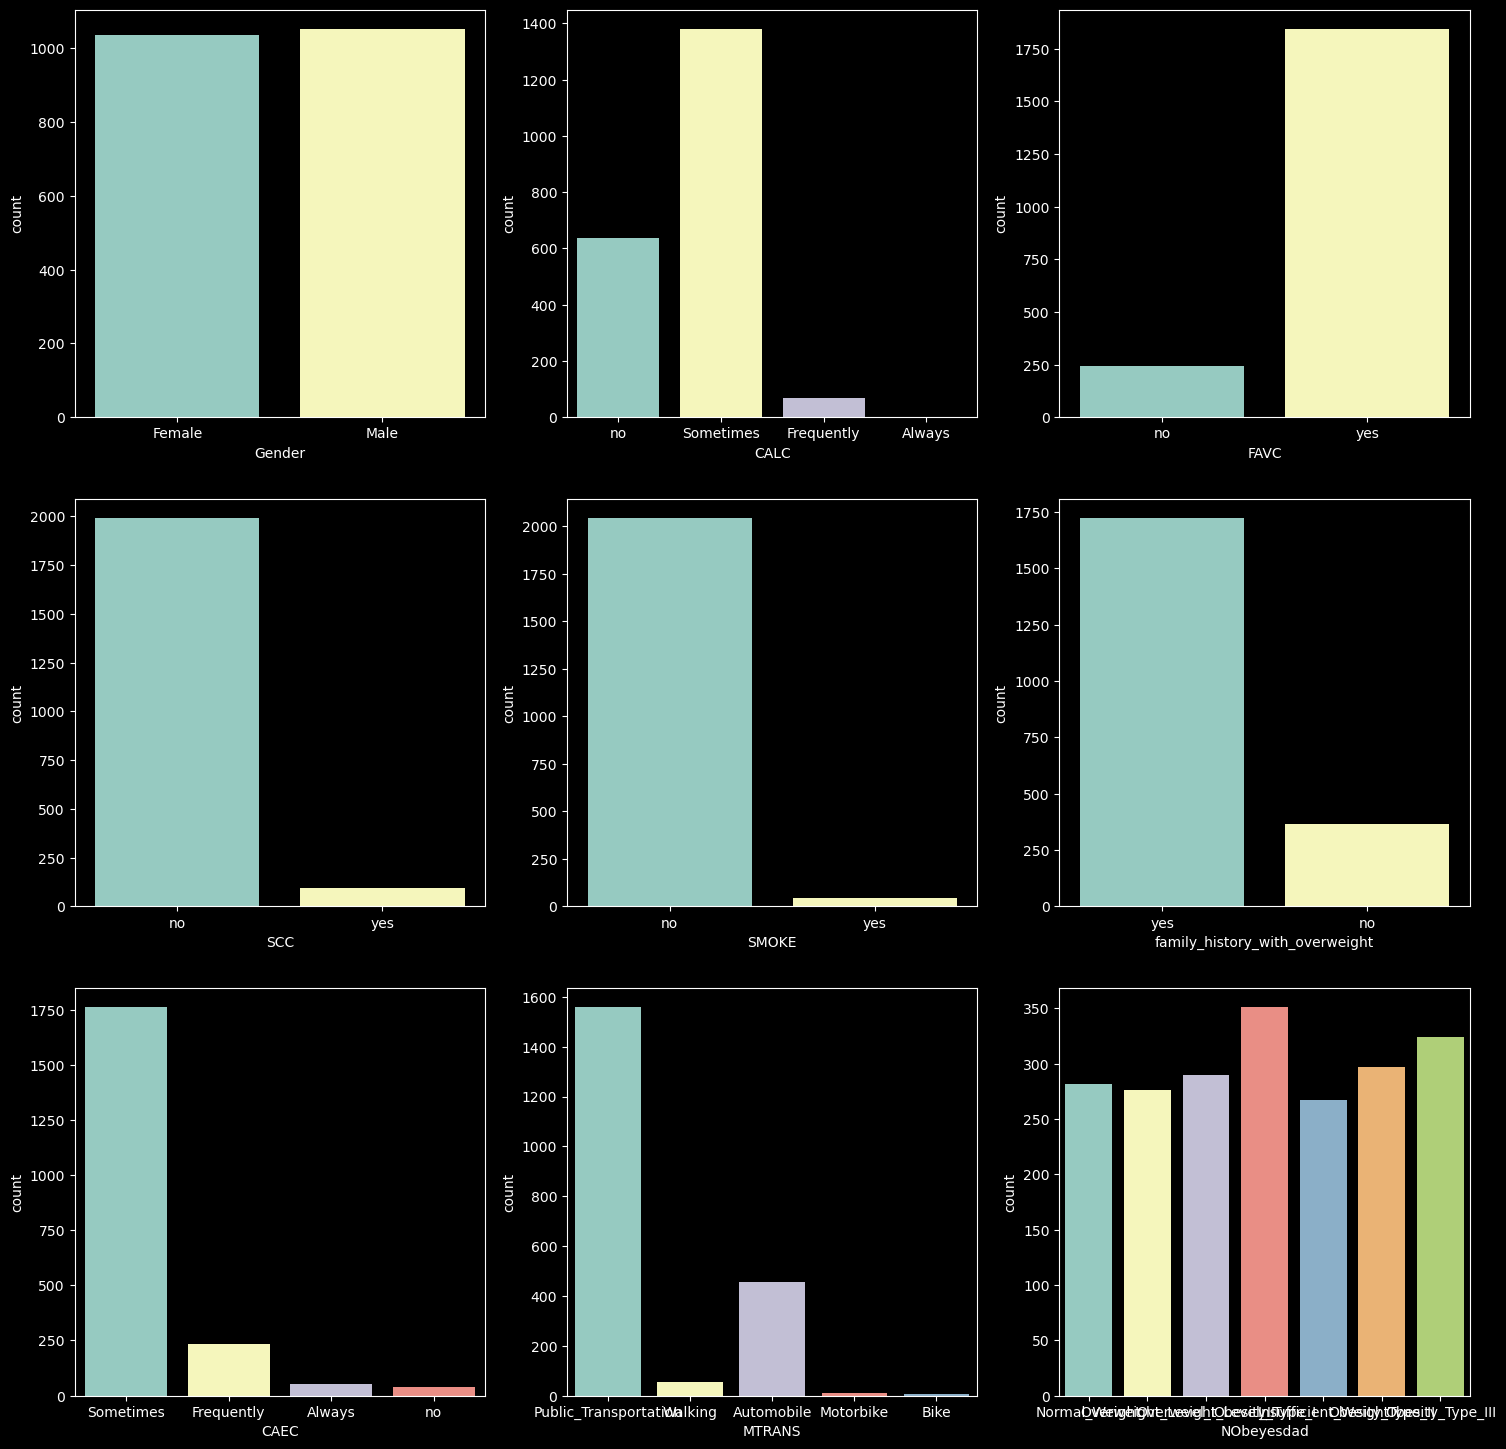

In [42]:
# now ploting these using count plot as all these data is categorical
fig, ax = plt.subplots(3,3, figsize=(18,18))

for col, ax in zip(objcloumns, ax.flatten()):
    sns.countplot(data=data, x = col, ax= ax)

its seen all columns are having irregular distribution of categories but the target column gender,NObeyesdad has good distribution of categories

In [46]:
# picking numerric or float datatype columns to plot histograms and boxplots
numcloumns = [x for x in data.columns if data[x].dtype!=object]
numcloumns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

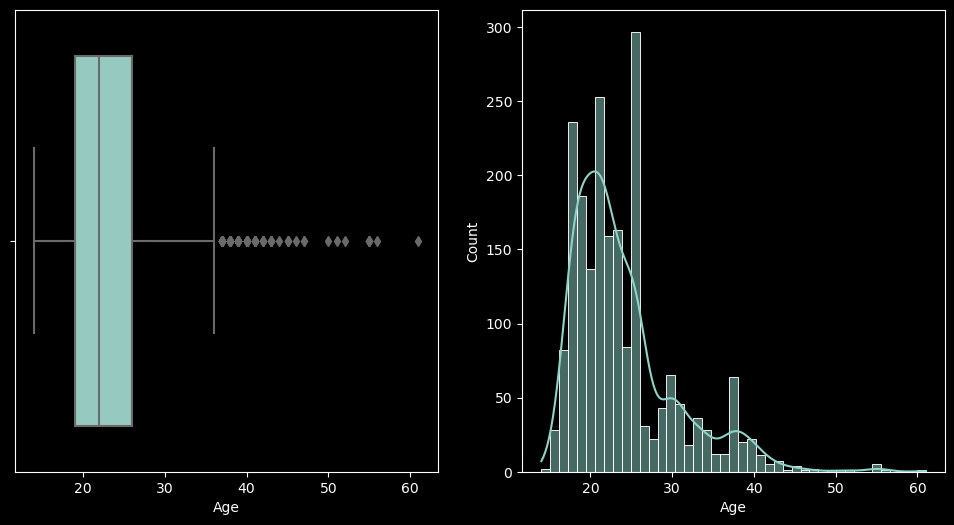

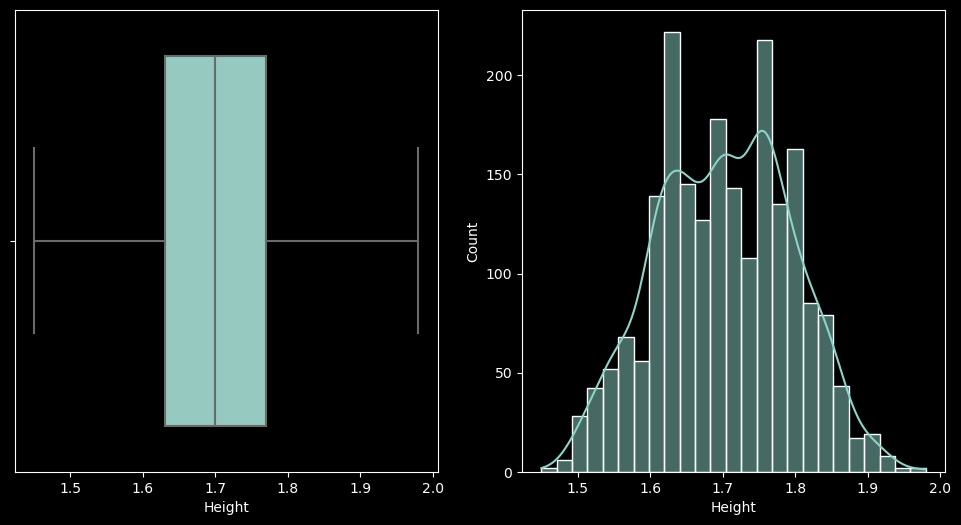

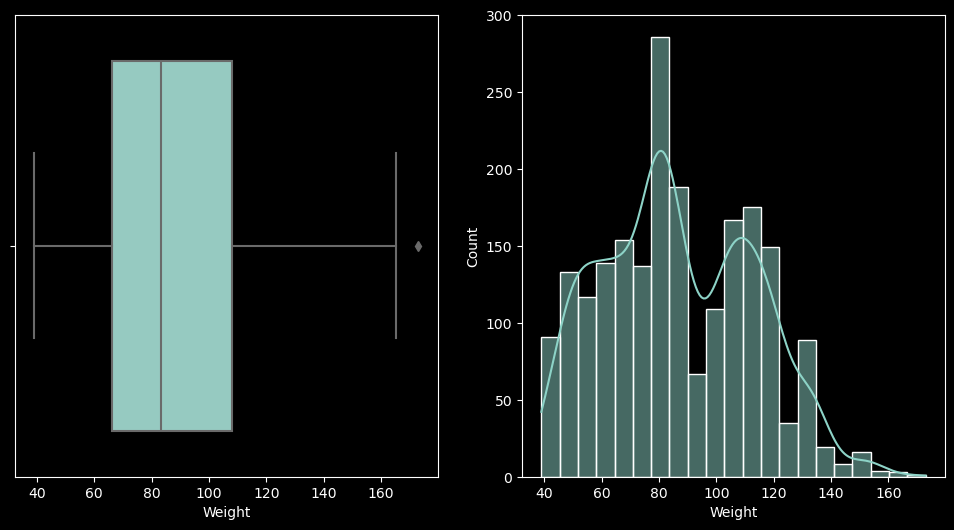

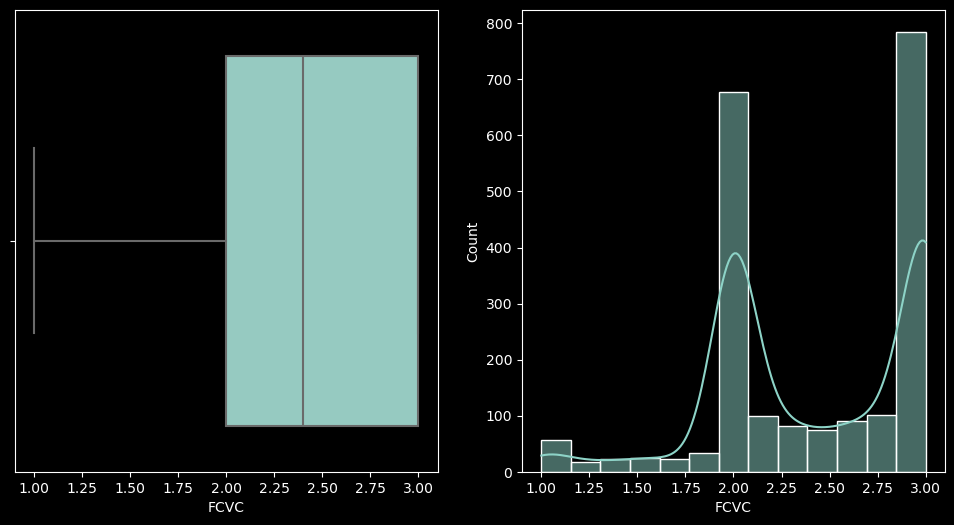

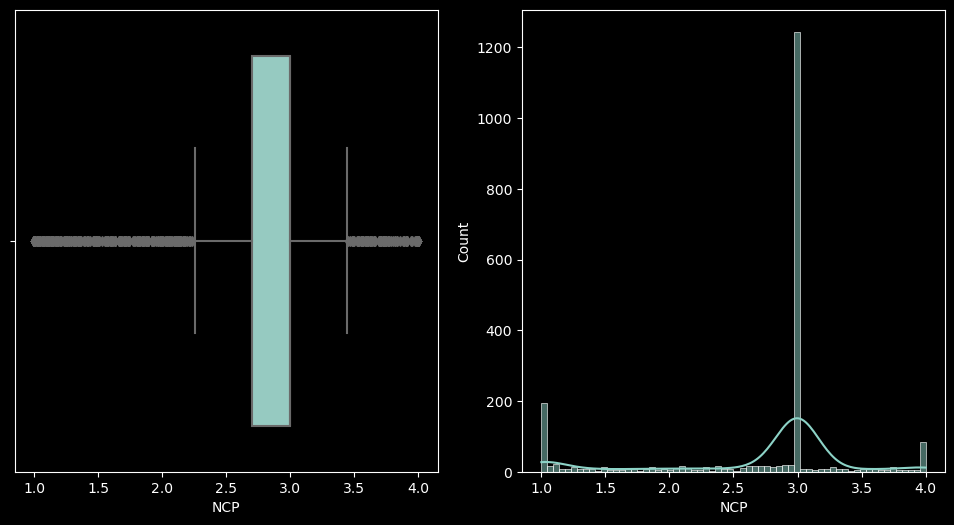

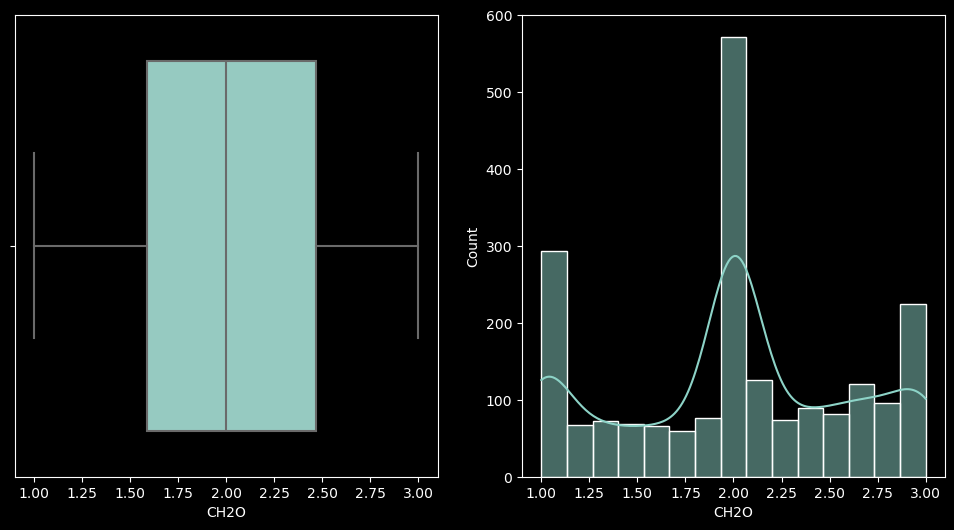

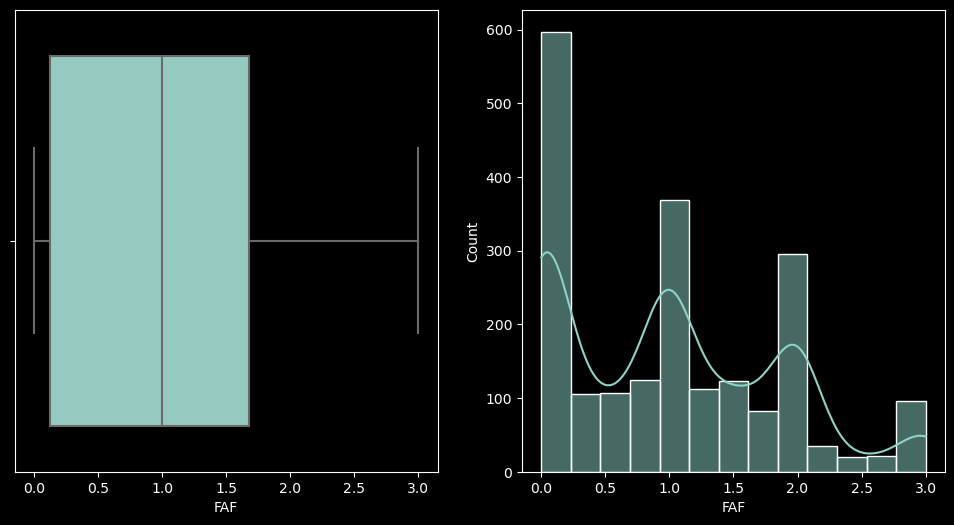

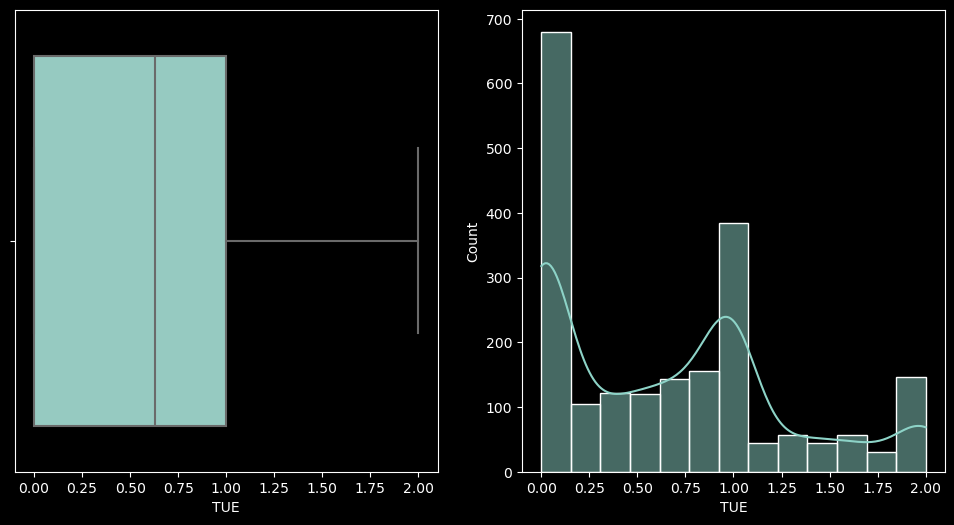

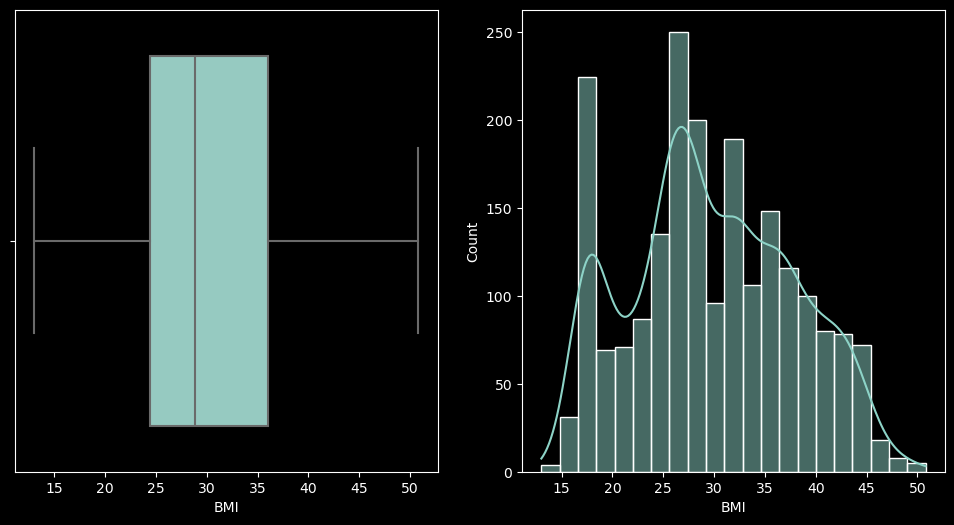

In [56]:
# Create subplots for each column individually
for col in numcloumns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(data=data, x=col, ax=ax[0])
    sns.histplot(data=data, x=col, ax=ax[1], kde=True)
    plt.show()


We can see age and NCP is having more number of outliers and the distribution of data for some features looks skewed to left and right

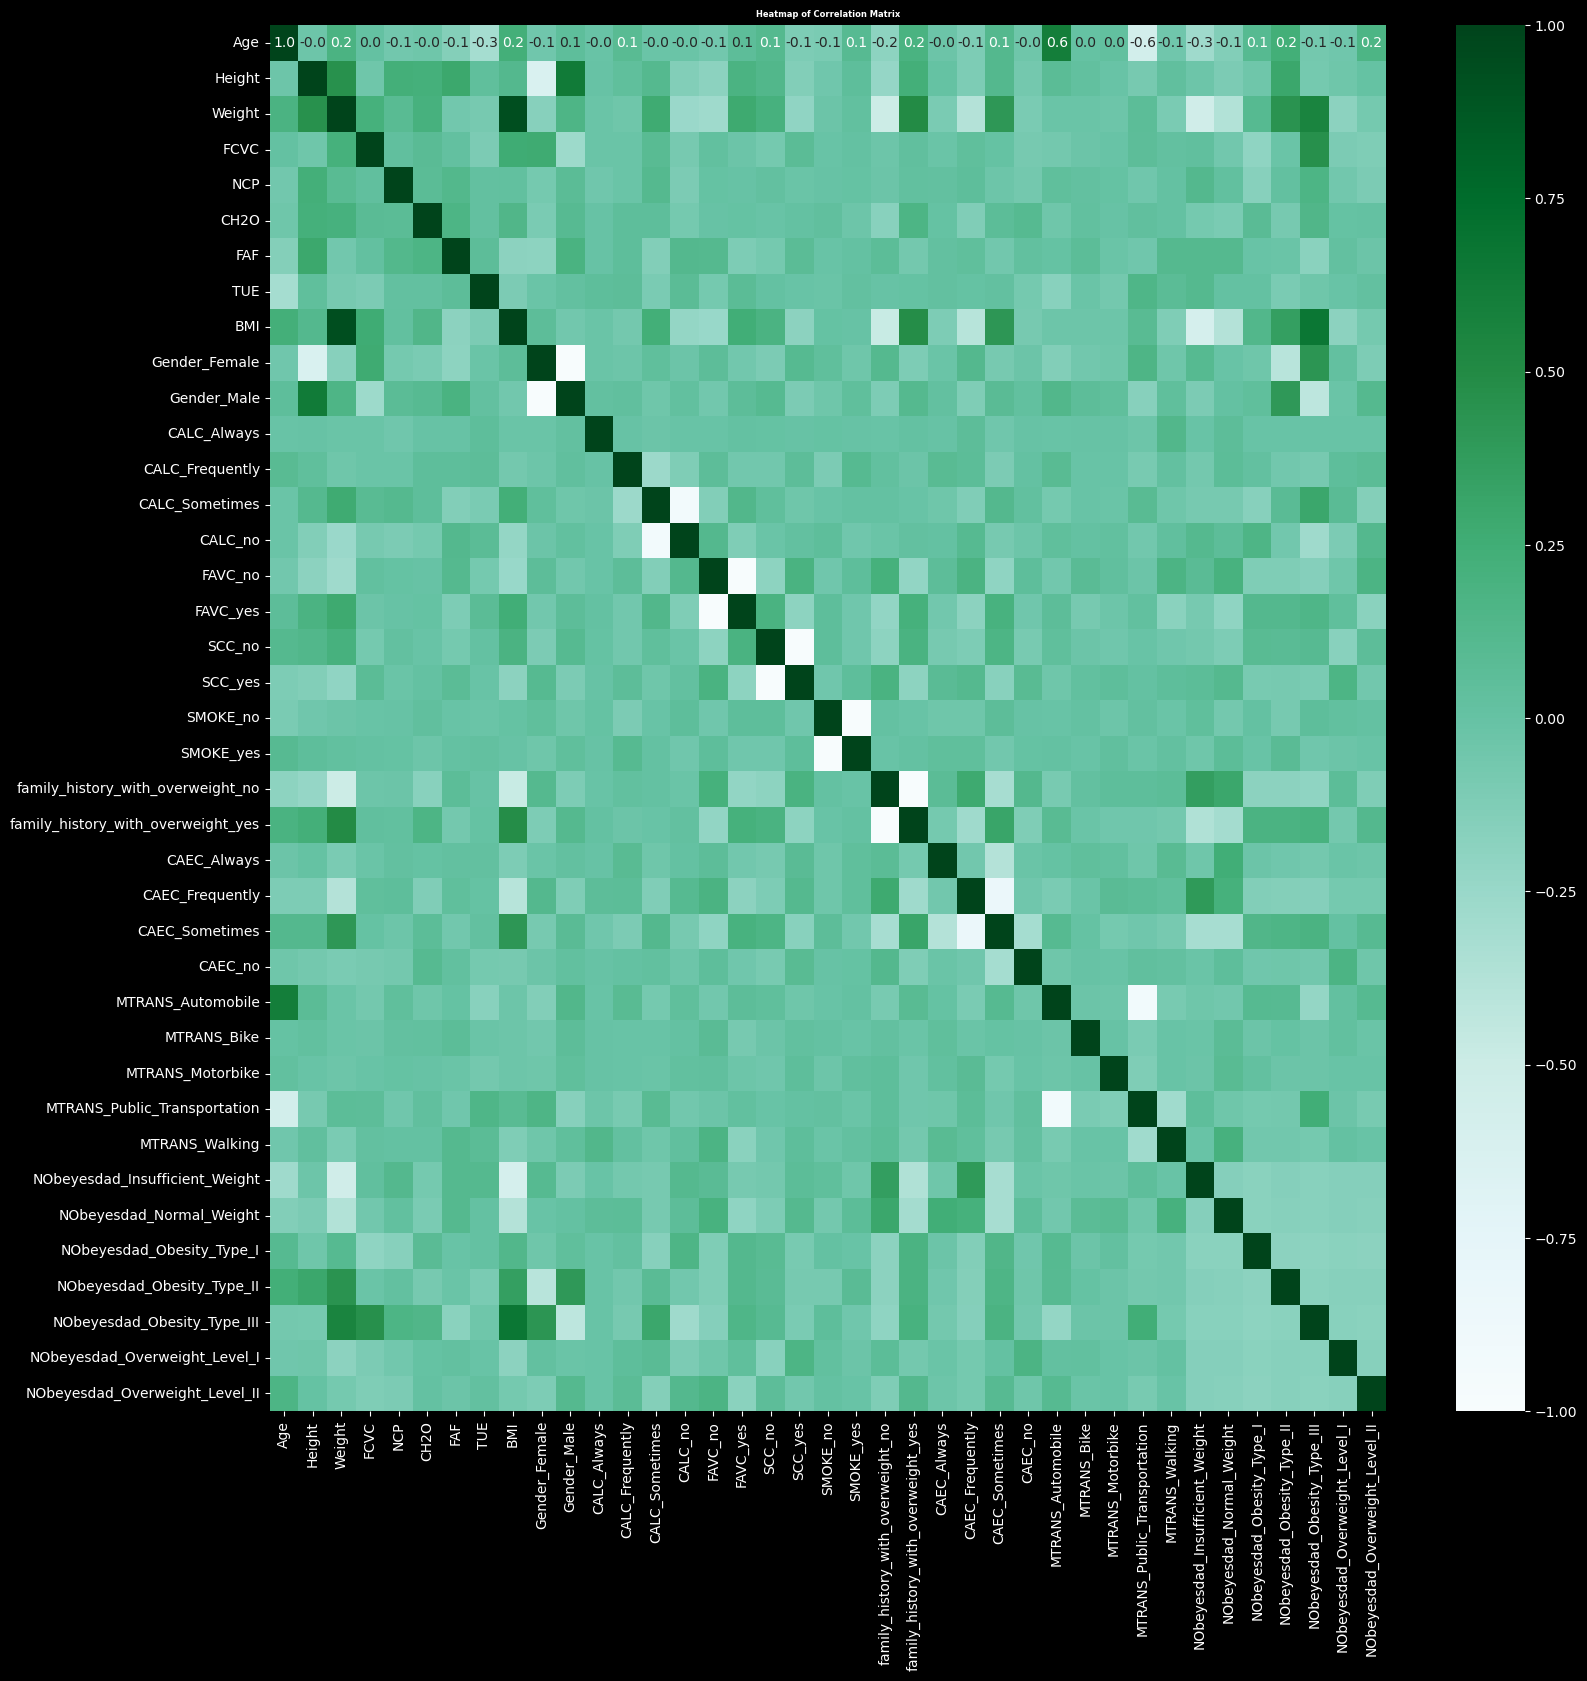

In [58]:
# Preprocessing Steps
#checking correlation between features - converting ctegorical variables into dummy variables to check correlation between features
data_dummies = pd.get_dummies(data)

# Calculating correlation matrix 
correlation_matrix = data_dummies.corr()


# plotting heatmap
plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".1f")
plt.title('Heatmap of Correlation Matrix', weight='bold', size=6)
plt.show()

4)Data Preprocesssing for appliying algorithm to classify
Now im Implementing ONE-Hot Encoding to convert the categorical variables into binary columns

In [59]:
objcloumns

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
#categorical columns except the target column
one_hot_cols = objcloumns[:-1]

# salecting only categorical columns from the dataframe
df_categorical = data[one_hot_cols]

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

#obtaining names of features generated by OneHotEncoder
one_hot_feature_names = encoder.get_feature_names_out(one_hot_cols)

one_hot_feature_names#so many features are added at the end due to one hot encoding

array(['Gender_Female', 'Gender_Male', 'CALC_Always', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'FAVC_no', 'FAVC_yes', 'SCC_no',
       'SCC_yes', 'SMOKE_no', 'SMOKE_yes',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'], dtype=object)

In [78]:
one_hot_cols

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS']

In [79]:
# Creating a DataFrame with transformed features
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)
# Joining DataFrames
df_final = pd.concat([data, df_encoded], axis=1)
df_final.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
# Dropping categorical columns
df_final.drop(columns=one_hot_cols, inplace=True)

In [81]:
# Visualizing the first few rows of the final DataFrame
df_final.head(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,...,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,24.39,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,24.24,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,23.77,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,26.85,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,28.34,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


5) Now Training the Model

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
#from lightgbm import LGBMClassifier

In [83]:
# Features
X = df_final.drop('NObeyesdad', axis=1)

# Target variable 
y = df_final['NObeyesdad']

In [90]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable y_train
y_encoded = label_encoder.fit_transform(y)


In [91]:
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [93]:
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    recall = recall_score(y_test, predictions, average='weighted')  
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)


Model: RandomForestClassifier
Recall: 0.983451536643026
Accuracy: 0.983451536643026
Precision: 0.9839501017798423
--------------------------------------------------
Model: DecisionTreeClassifier
Recall: 0.9739952718676123
Accuracy: 0.9739952718676123
Precision: 0.9749863642148207
--------------------------------------------------


In [ ]:
# we seems to achieve good accuracy using Random Forest Classifier